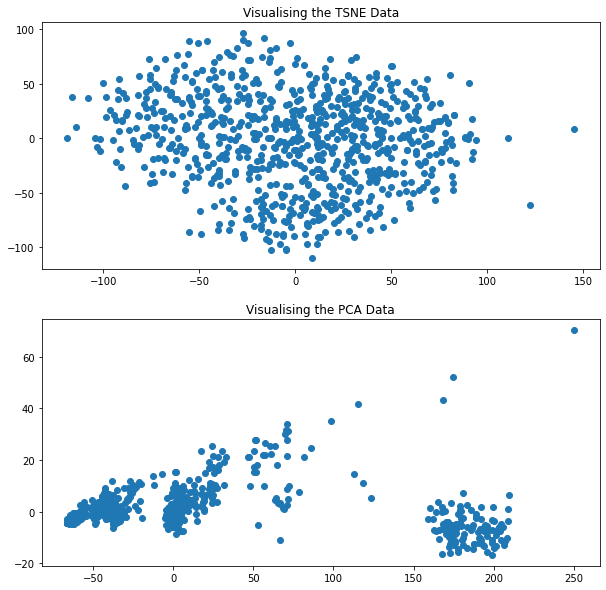

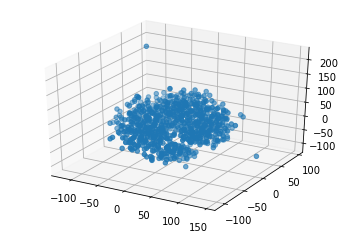

In [4]:
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import FixedLocator, FixedFormatter
from sklearn.decomposition import PCA
from mpl_toolkits import mplot3d
#Importing data
fig, ay = plt.subplots(2,figsize=(10,10))
data_raw = pd.read_csv(r"C:\Users\udit sharma\Desktop\Aut\Data Mining and Machine Learning\Assignment 2 Dataset\Sales_Transactions_Dataset_Weekly.csv")
data_num=data_raw._get_numeric_data()
data_emb=TSNE(3).fit_transform(data_num)
# print(data_emb)
ay[0].scatter(data_emb[:,0], data_emb[:,1])
ay[0].set_title('Visualising the TSNE Data')
data_raw=data_raw.drop(columns='Product_Code')
pca = PCA(n_components=2)
data_st=pca.fit_transform(data_raw)
# print(data_st)
ay[1].scatter(data_st[:,0], data_st[:,1])
ay[1].set_title('Visualising the PCA Data')
plt.show()
ax =plt.axes(projection='3d')

ax.scatter3D(data_emb[:,0], data_emb[:,1], data_emb[:,2])

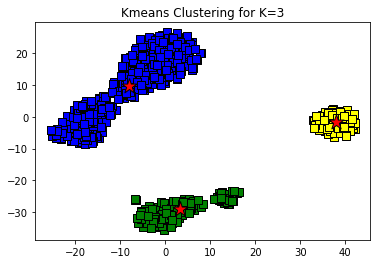

In [10]:
from sklearn.cluster import KMeans
import sklearn
km=KMeans(3)
kmfit=km.fit(data_emb)
kmfp=km.fit_predict(data_emb)
data_color=['blue','green','yellow','purple','violet']
for x in range(3):
 plt.scatter(data_emb[kmfp == x,0],
            data_emb[kmfp == x,1],
            data_emb[kmfp== x,2],
            s=50, c=data_color[x],
            marker='s', edgecolor='black',
            label='cluster '+str(x+1))

plt.scatter(kmfit.cluster_centers_[:, 0],
            kmfit.cluster_centers_[:, 1],
            s=250, marker='*',
            c='red', edgecolor='black',
            label='centroids')
plt.title('Kmeans Clustering for K=3')
plt.show()